## Set up API credentials to collect botometer scores

In [1]:
import botometer

rapidapi_key = "YOUR KEY HERE"

twitter_app_auth = {
    'consumer_key': 'YOUR KEY HERE',
    'consumer_secret': 'YOUR KEY HERE',
    'access_token': 'YOUR KEY HERE',
    'access_token_secret': 'YOUR KEY HERE',
  }

bom = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

In [2]:
import pandas as pd

## Batch 1 

In [3]:
most_frequent_users_istandwithdan = open("/Users/grahamtj/Documents/Research/2020/Victoria_COVID/ratioed_morrison/likes_scraped_manually_statusID_1322793255021420545.txt")
file_contents = most_frequent_users_istandwithdan.read()
contents_split = file_contents.splitlines()

In [7]:
# remove duplicates 
contents_split = list(dict.fromkeys(contents_split))
len(contents_split)

In [9]:
# set 1
users_set1_istandwithdan_bot_scores = []

for screen_name, result in bom.check_accounts_in(contents_split):
    users_set1_istandwithdan_bot_scores.append([screen_name,result])
    
with open("/Users/grahamtj/Documents/Research/2020/Victoria_COVID/ratioed_morrison/botometer_scores_morrison_tweet_1322793255021420545.txt", 'w') as output:
    for row in users_set1_istandwithdan_bot_scores:
        output.write(str(row) + '\n')

## Batch 2

In [23]:
most_frequent_users_istandwithdan_batch2 = open("/Users/grahamtj/Documents/Research/2020/Victoria_COVID/ratioed_morrison/likes_scraped_manually_statusID_1322793255021420545_batch2.txt")
file_contents_batch2 = most_frequent_users_istandwithdan_batch2.read()
contents_split_batch2 = file_contents_batch2.splitlines()

# remove duplicates 
contents_split_batch2 = list(dict.fromkeys(contents_split_batch2))
len(contents_split_batch2)

25

In [24]:
# set 2
users_set2_istandwithdan_bot_scores = []

for screen_name, result in bom.check_accounts_in(contents_split_batch2):
    users_set2_istandwithdan_bot_scores.append([screen_name,result])
    
with open("/Users/grahamtj/Documents/Research/2020/Victoria_COVID/ratioed_morrison/botometer_scores_morrison_tweet_1322793255021420545_batch2.txt", 'w') as output:
    for row in users_set2_istandwithdan_bot_scores:
        output.write(str(row) + '\n')

## Combine results into single dataframe 

In [25]:
# We need to parse the results and store in a dataframe
istandwithdan_all_scores = []

for i in range(1, 100):
    try:
        istandwithdan_all_scores.append([users_set1_istandwithdan_bot_scores[i][0],
                                         users_set1_istandwithdan_bot_scores[i][1].get("cap").get("english"),
                                         users_set1_istandwithdan_bot_scores[i][1].get("cap").get("universal"),
                                         '1322793255021420545'])
    except:
        continue
        
for i in range(1, 100):
    try:
        istandwithdan_all_scores.append([users_set2_istandwithdan_bot_scores[i][0],
                                         users_set2_istandwithdan_bot_scores[i][1].get("cap").get("english"),
                                         users_set2_istandwithdan_bot_scores[i][1].get("cap").get("universal"),
                                         '1322793255021420545'])
    except:
        continue

In [26]:
istandwithdan_all_scores_DF = pd.DataFrame(istandwithdan_all_scores)
istandwithdan_all_scores_DF.columns = ['user_ID', 'CAP_english', 'CAP_universal', 'tweet_ID']

In [27]:
istandwithdan_all_scores_DF.head()

,user_ID,CAP_english,CAP_universal,tweet_ID
0,@BrucePoon,0.362646,0.346921,1322793255021420545
1,@connor_keir,0.676362,0.773346,1322793255021420545
2,@almarty,0.306188,0.522240,1322793255021420545
3,@SNoorbergen,0.797782,0.805768,1322793255021420545
4,@Kj38676057,0.867012,0.813043,1322793255021420545


In [28]:
istandwithdan_all_scores_DF.shape

(72, 4)

In [29]:
istandwithdan_all_scores_DF.describe()

,CAP_english,CAP_universal
count,72.000000,72.000000
mean,0.645466,0.667889
std,0.219616,0.207674
min,0.000000,0.233324
25%,0.447947,0.522240
50%,0.738478,0.770384
75%,0.797302,0.806896
max,1.000000,1.000000


In [39]:
# If we set 90% as the minimum threshold, how many bots?
istandwithdan_all_scores_DF['user_ID'][istandwithdan_all_scores_DF['CAP_english'] > 0.9].count() # for the 'English' score 

3

In [43]:
# what are the names of accounts with score greater than 0.9?
istandwithdan_all_scores_DF['user_ID'][istandwithdan_all_scores_DF['CAP_english'] > 0.8]

4          @Kj38676057
11     @Dochez29935725
20         @baxr6turbo
22         @MalkawiYaz
24       @DograShwetaa
29          @swthmalbm
52      @richardreade9
53       @FayP14091299
56        @Msa87079318
60         @jennie0625
63    @myerschrismyer1
64            @1RAMROY
65       @Tina77672726
67      @CgovSolutions
70     @jeevan60131093
Name: user_ID, dtype: object

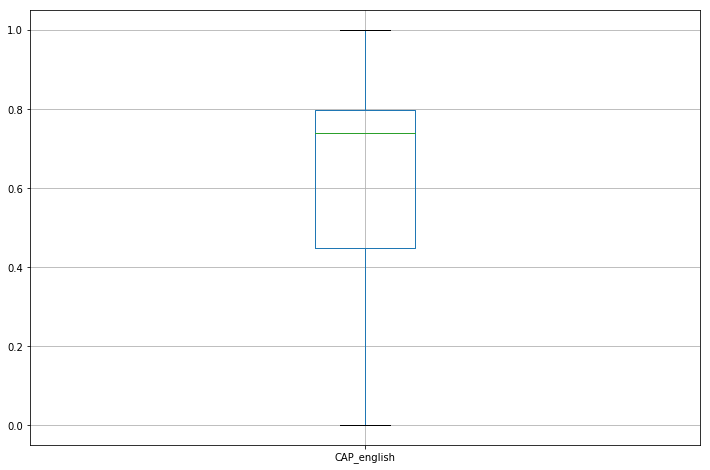

In [33]:
# box plot 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

istandwithdan_all_scores_DF.boxplot(column='CAP_english')
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

Text(0, 0.5, 'Fraction of data')

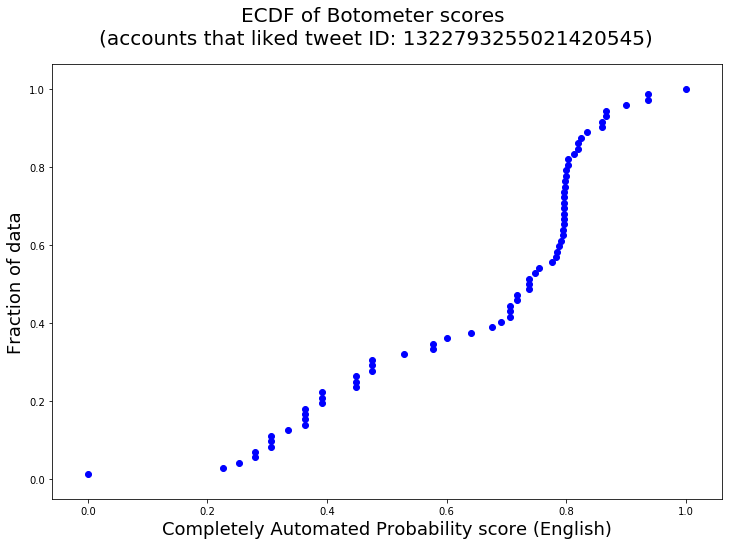

In [34]:
# visualise the bot scores
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,y = ecdf(istandwithdan_all_scores_DF['CAP_english'])
plt.scatter(x=x, y=y, color='blue')

fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size) 

plt.suptitle('ECDF of Botometer scores \n(accounts that liked tweet ID: 1322793255021420545)', fontsize=20)
plt.xlabel('Completely Automated Probability score (English)', fontsize=18)
plt.ylabel('Fraction of data', fontsize=18)

## Collect all replies using twarc

In [ ]:
# We collect the replies using the 'twarc' module, 
# but we need to run this separately *in the command line* using the following command:
# (note the tweet ID to specify which tweet replies to collect).

# twarc replies 1322793255021420545 --recursive > replies_1322793255021420545.jsonl

## Sentiment analysis 

In [3]:
# need to import data
import pandas as pd
replies_data = pd.read_json (r'replies_1322793255021420545.jsonl', lines=True)

In [4]:
replies_data.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,quoted_status_permalink,quoted_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,metadata,extended_entities
0,2020-11-01 06:51:02+00:00,1322793255021420545,1322793255021420544,Well done Australia. How good! Let’s keep it t...,False,"[0, 160]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,"{'url': 'https://t.co/WcL4VytvJL', 'expanded':...",{'created_at': 'Sun Nov 01 01:44:31 +0000 2020...,295,3112,False,False,0.0,en,NaN,NaN
1,2020-11-02 00:45:49+00:00,1323063731123679232,1323063731123679232,@ScottMorrisonMP So what are YOU doing to fix ...,False,"[17, 128]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.322793e+18,1.322793e+18,...,NaN,NaN,0,0,False,False,NaN,en,"{'iso_language_code': 'en', 'result_type': 're...",NaN
2,2020-11-02 00:44:37+00:00,1323063427607142401,1323063427607142400,@ScottMorrisonMP Well stop telling people to o...,False,"[17, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.322793e+18,1.322793e+18,...,NaN,NaN,0,0,False,False,NaN,en,"{'iso_language_code': 'en', 'result_type': 're...",NaN
3,2020-11-02 00:44:29+00:00,1323063397374590977,1323063397374590976,@ScottMorrisonMP https://t.co/c1pVOWpThP,False,"[16, 16]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.322793e+18,1.322793e+18,...,NaN,NaN,0,0,False,False,0.0,und,"{'iso_language_code': 'und', 'result_type': 'r...","{'media': [{'id': 1323063387882885120, 'id_str..."
4,2020-11-02 00:43:52+00:00,1323063239228461059,1323063239228461056,@ScottMorrisonMP Stay safe,False,"[17, 26]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",1.322793e+18,1.322793e+18,...,NaN,NaN,0,0,False,False,NaN,en,"{'iso_language_code': 'en', 'result_type': 're...",NaN


In [5]:
replies_data.shape

(806, 31)

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
# calculate for all texts in dataset

sentiment_scores = []

for text in replies_data['full_text']:
    try:
        sentiment_scores.append(analyser.polarity_scores(text))
    except:
        sentiment_scores.append({'neg': 999, 'neu': 999, 'pos': 999, 'compound': 999})

In [9]:
sentiment_compound_scores = [item['compound'] for item in sentiment_scores]

In [10]:
replies_data['compound_sentiment_score'] = sentiment_compound_scores

In [11]:
# examine first sentiment score
replies_data['compound_sentiment_score'][0]

0.8065

In [12]:
# and look at the first text
replies_data['full_text'][0]

'Well done Australia. How good! Let’s keep it that way. We’ve seen here, and are seeing again overseas, how quickly this virus spreads, so please stay COVIDSafe. https://t.co/WcL4VytvJL'

### Descriptive statistics for sentiment analysis

In [13]:
replies_data['compound_sentiment_score'].describe()

count    806.000000
mean       0.077067
std        0.448166
min       -0.946100
25%       -0.152600
50%        0.000000
75%        0.421500
max        0.957000
Name: compound_sentiment_score, dtype: float64

In [15]:
# The median will be 0 but check anyway:
replies_data['compound_sentiment_score'].median()

0.0

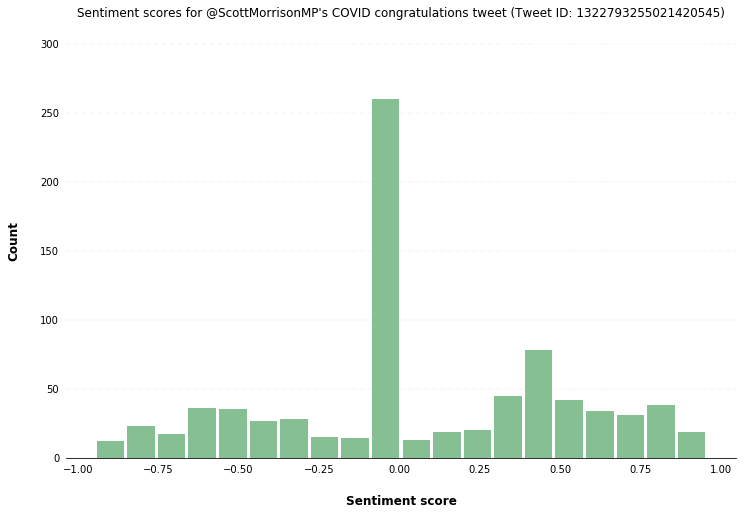

In [31]:
# Visualise histogram of sentiment scores
from matplotlib.ticker import StrMethodFormatter

ax = replies_data.hist(column='compound_sentiment_score', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set title
    x.set_title("Sentiment scores for @ScottMorrisonMP's COVID congratulations tweet (Tweet ID: 1322793255021420545)")
    
    # Set x-axis label
    x.set_xlabel("Sentiment score", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Count", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

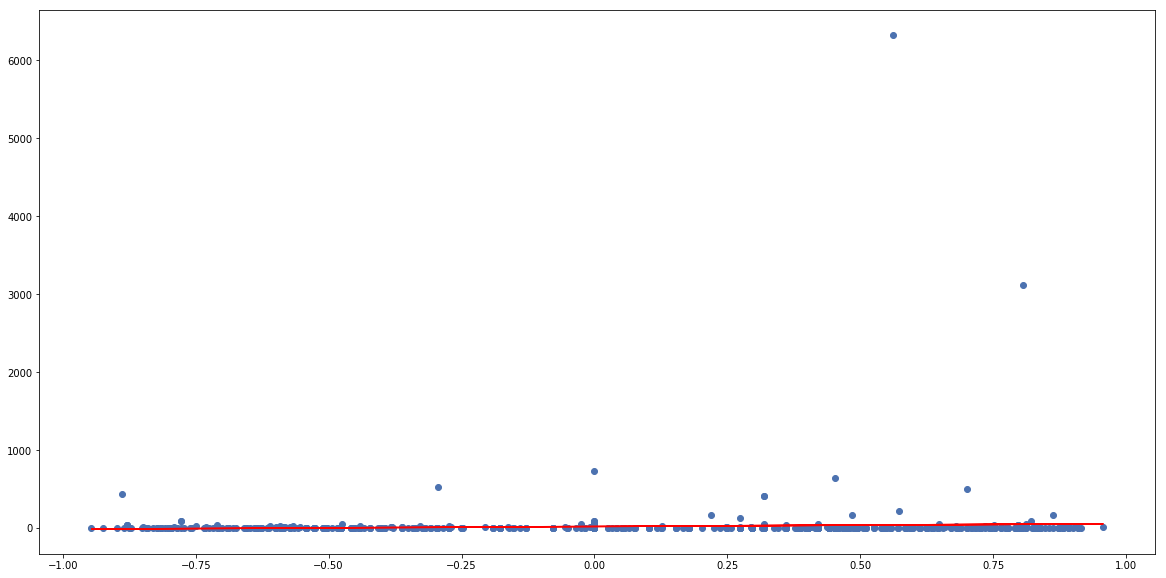

In [20]:
# linear regression - is there a relationship between sentiment and number of likes?
from sklearn.linear_model import LinearRegression

X = replies_data['compound_sentiment_score'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = replies_data['favorite_count'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

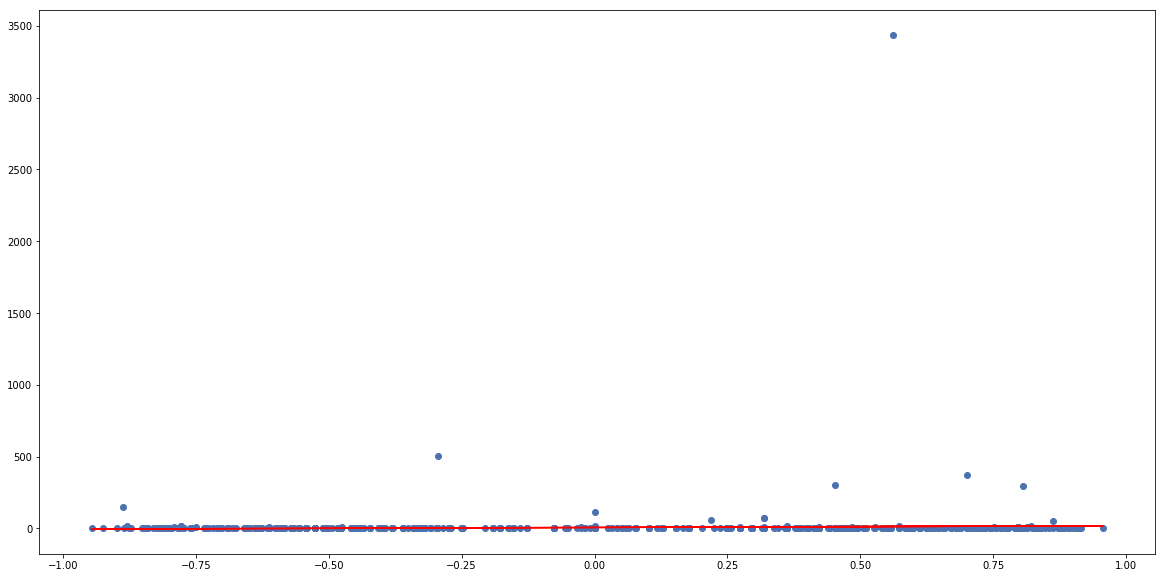

In [22]:
# linear regression - is there a relationship between sentiment and number of retweets?
from sklearn.linear_model import LinearRegression

X = replies_data['compound_sentiment_score'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = replies_data['retweet_count'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()